In [1]:
import os 
import matplotlib.pyplot as plt
import random
import numpy as np
from PIL import Image 

In [ ]:
data_address = "dataset"

### **plot some image**

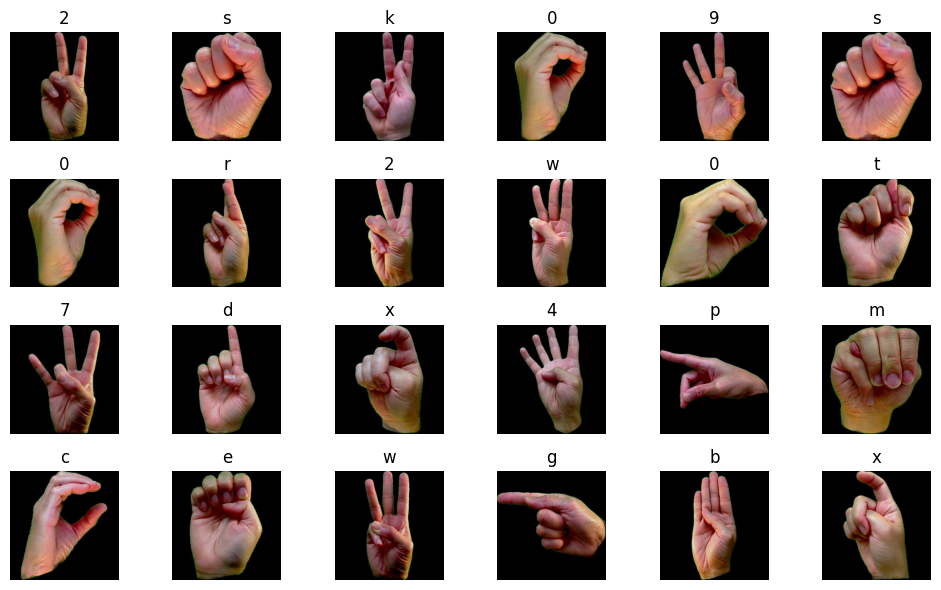

In [7]:
plt.figure(figsize=(10,6))
for i in range(24):
    plt.subplot(4,6,i+1)
    sub_class = random.choice(os.listdir(data_address))
    sub_path = os.path.join(data_address,sub_class)
    sub_image = random.choice(os.listdir(sub_path))
    img = Image.open(os.path.join(sub_path,sub_image))

    plt.imshow(img)
    plt.title(sub_class)
    plt.axis("off")
plt.tight_layout()

### **split data to train and test**

In [11]:
# create train adn test folders
data = "data"
# os.makedirs(data)
train_path = os.path.join(data,"train")
test_path = os.path.join(data,"test")
# os.makedirs(train_path)
# os.makedirs(test_path)

In [101]:
import random
import shutil

In [104]:
# move data to folders
for i in os.listdir(data_address)[2:]:
    os.makedirs(os.path.join(train_path,i))
    os.makedirs(os.path.join(test_path,i))
    data_list = os.listdir(data_address+"/"+i)
    random.shuffle(data_list)
    
    # Move Data
    for j in data_list[:7]:
        shutil.move(os.path.join(data_address,i,j), os.path.join(test_path,i,j))
    for j in data_list[7:]:
        shutil.move(os.path.join(data_address,i,j), os.path.join(train_path,i,j))
    

## **transform data**

In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

c:\Users\admin\anaconda3\envs\torchreid\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### **add some transform and plot them**

In [4]:
data_transform = transforms.Compose([
    transforms.RandomEqualize(p=0.25),
    # transforms.RandomPerspective(distortion_scale=0.6, p=1.0),
    transforms.RandomRotation(degrees=(-20, 20)),
    # transforms.ElasticTransform(alpha=100.0),
    # transforms.ColorJitter(brightness=.5, hue=.3),
    # transforms.RandomResizedCrop(size=(300, 300)),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.)),
    transforms.Resize(size=(256, 256)),
    # transforms.RandomPosterize(bits=2),
    transforms.ToTensor()
])

In [ ]:
transformed_image = [data_transform(img) for i in range(20)]

for index, image in enumerate(transformed_image):
    plt.subplot(4,5,index+1)

    plt.imshow(image.permute(1, 2, 0))
    plt.axis("off")
plt.tight_layout()

## **DataLoader**

### **add Transform to DataLoader**

In [12]:
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform,
                                  target_transform=None    
)
test_data = datasets.ImageFolder(root=test_path,
                                  transform=data_transform    
)
print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 2263
    Root location: data\train
    StandardTransform
Transform: Compose(
               RandomEqualize(p=0.25)
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.0))
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 252
    Root location: data\test
    StandardTransform
Transform: Compose(
               RandomEqualize(p=0.25)
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.0))
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )


In [13]:
class_names = train_data.classes
class_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [14]:
class_dict = train_data.class_to_idx
class_dict

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}

In [15]:
len(train_data), len(test_data)

(2263, 252)

In [16]:
# first image info
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Image shape: torch.Size([3, 256, 256])
Image datatype: torch.float32
Image label: 0
Label datatype: <class 'int'>


Original shape: torch.Size([3, 256, 256]) -> [color_channels, height, width]
Image permute shape: torch.Size([256, 256, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, '0')

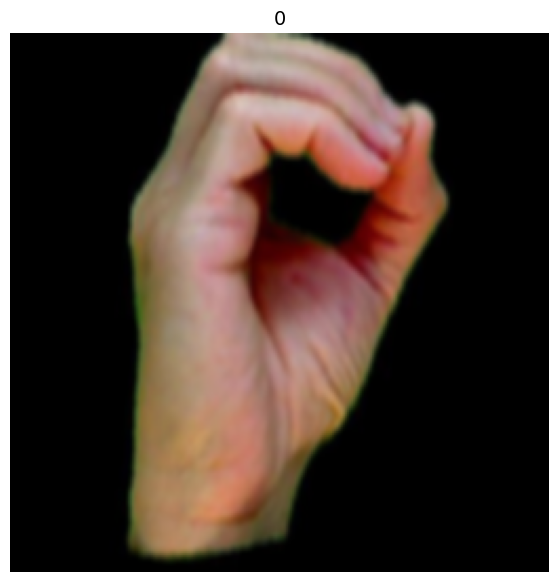

In [17]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14)

### **DataLoader**

In [18]:
BATCH_SIZE = 8
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x20960d36f48>,
 <torch.utils.data.dataloader.DataLoader at 0x20960d36f08>)

In [20]:
len(train_dataloader), len(train_data)

(283, 2263)

In [21]:
img, label = next(iter(train_dataloader))

In [22]:
# [batch_size,color_channel, height,width]
img.shape, label

(torch.Size([8, 3, 256, 256]), tensor([14,  7,  9, 22, 26, 10, 24, 17]))

### **Create Custom DataLoader**

In [23]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [24]:
train_data.class_to_idx

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}

In [25]:
target_directory = train_path
print(f"Target directory: {target_directory}")

Target directory: data\train


In [26]:
class_names_found = sorted([entry.name for entry in list(os.scandir(train_path))])
print(f"Class names found: {class_names_found}")

Class names found: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [27]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [ ]:
find_classes(train_path)

**for custom dataset**

In [57]:
class ImageFolderDataset(Dataset):
    def __init__(self,
                 target_dir:str,
                 transform=None) -> None:
        
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpeg")) # note: you'd have to update this if you've got .png's or .jpeg's
        self.transform = transform        
        self.classes, self.classes_to_idx = find_classes(target_dir)
    
    def __len__(self):
        return len(self.paths)
    
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        img = self.laod_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.classes_to_idx[class_name]        
        
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx
    
    def laod_image(self, index:int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)

In [58]:
train_transform = transforms.Compose({
    transforms.Resize(size=(128,128)),
    transforms.RandomRotation(degrees=(-20, 20)),
    transforms.RandomEqualize(p=0.25),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.)),
    transforms.ToTensor()
})

train_transform = transforms.Compose({
    transforms.Resize(size=(128,128)),
    transforms.ToTensor()
})

In [130]:
train_data_c = ImageFolderDataset(target_dir=train_path,
                                  transform=train_transform)

test_data_c =  ImageFolderDataset(target_dir=test_path,
                                  transform=train_transform)


In [143]:
BATCH_SIZE = 8
NUM_WORKERS = 0

train_dataloader = DataLoader(dataset=train_data_c,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data_c,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x209614cd708>,
 <torch.utils.data.dataloader.DataLoader at 0x209614cdcc8>)

In [69]:
from torch import nn

In [174]:
class TinyVGG(nn.Module):
    def __init__(self,input_shape:int,
                 hidden_unit:int,
                 output_shape:int
                 ) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                        out_channels=hidden_unit,
                        kernel_size=3,
                        stride=1,
                        padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                        out_channels=hidden_unit,
                        kernel_size=3,
                        stride=1,
                        padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                            stride=2)
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_unit,hidden_unit,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_unit,hidden_unit,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_unit*32*32,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)

        return x

        

In [175]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [176]:
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_unit=10, 
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10240, out_features=36, bias=True)
  )
)

In [146]:
# get single image batch
image_batch, label_batch = next(iter(train_dataloader))

In [127]:
image_batch.shape

torch.Size([3, 128, 128])

In [108]:
from torchinfo import summary


In [124]:
summary(model_0, input_size=[1, 3,256, 256]) # do a test pass through of an example input size 

torch.Size([1, 10, 128, 128])
torch.Size([1, 10, 64, 64])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 36]                   --
├─Sequential: 1-1                        [1, 10, 128, 128]         --
│    └─Conv2d: 2-1                       [1, 10, 256, 256]         280
│    └─ReLU: 2-2                         [1, 10, 256, 256]         --
│    └─Conv2d: 2-3                       [1, 10, 256, 256]         910
│    └─ReLU: 2-4                         [1, 10, 256, 256]         --
│    └─MaxPool2d: 2-5                    [1, 10, 128, 128]         --
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-6                       [1, 10, 128, 128]         910
│    └─ReLU: 2-7                         [1, 10, 128, 128]         --
│    └─Conv2d: 2-8                       [1, 10, 128, 128]         910
│    └─ReLU: 2-9                         [1, 10, 128, 128]         --
│    └─MaxPool2d: 2-10                   [1, 10, 64, 64]           --
├─Sequentia

Feature batch shape: torch.Size([8, 3, 128, 128])
Labels batch shape: torch.Size([8])


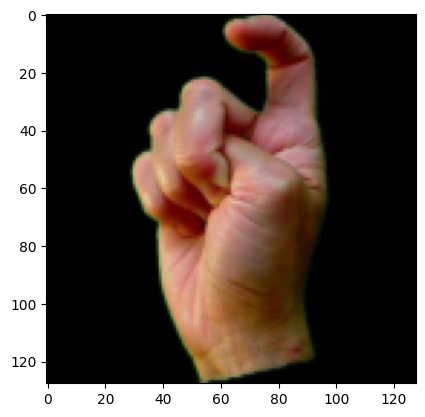

Label: 33


In [153]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze().permute(1, 2, 0)
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {label}")

In [162]:
model_0(train_features)

torch.Size([8, 10, 64, 64])
torch.Size([8, 10, 32, 32])


tensor([[ 4.4654e-04,  1.7103e-02, -3.2146e-03,  1.1650e-02,  8.2682e-03,
          6.7405e-03,  1.8181e-02,  1.2317e-02,  5.7531e-03, -1.4341e-02,
          1.9890e-02, -5.8047e-03,  1.8326e-02, -1.4880e-03,  3.1853e-02,
          4.5703e-03, -3.5848e-03, -4.7978e-03,  9.7128e-03,  1.1901e-02,
          1.2137e-02,  1.9941e-03,  1.9847e-02, -6.0278e-03, -6.3921e-03,
          5.0709e-03,  1.2920e-02,  2.0543e-02,  1.7219e-02,  1.9185e-02,
          3.9166e-03, -2.9326e-04, -8.0642e-03,  8.5073e-03,  1.2243e-02,
         -1.7140e-02],
        [ 1.1562e-03,  1.8089e-02, -3.0048e-03,  1.1329e-02,  6.8763e-03,
          5.3815e-03,  1.8474e-02,  1.2125e-02,  7.3832e-03, -1.4327e-02,
          2.0099e-02, -4.9957e-03,  1.7530e-02, -1.6541e-03,  3.1718e-02,
          5.3789e-03, -5.0400e-03, -4.1390e-03,  1.0211e-02,  1.3723e-02,
          1.3207e-02,  2.1786e-03,  2.0445e-02, -5.5830e-03, -4.2875e-03,
          4.7931e-03,  1.3068e-02,  1.9321e-02,  1.6649e-02,  1.9017e-02,
          2.340

In [165]:
import torch.nn.modules
import torch.utils
import torch.utils.data

In [177]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn :torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
    
    model.train()

    train_loss,train_acc = 0,0

    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device),y.to(device)
    
        y_pred = model(X)

        loss = loss_fn(y_pred,y)
        train_loss += loss.item()


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)

    return train_loss,train_acc

In [178]:
def test_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn :torch.nn.Module,
               device=device):
    
    model.eval()
    test_loss, test_acc = 0,0

    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device),y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred,y)
        test_loss += loss.item()

        test_label = y_pred.argmax(dim=1)
        test_acc += (test_label == y).sum().item()/len(test_label)
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)

    return test_loss,test_acc

In [179]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [180]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 25

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_unit=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  4%|▍         | 1/25 [00:24<09:57, 24.91s/it]

Epoch: 1 | train_loss: 2.0810 | train_acc: 0.4266 | test_loss: 0.6190 | test_acc: 0.8008


  8%|▊         | 2/25 [00:49<09:31, 24.85s/it]

Epoch: 2 | train_loss: 0.3493 | train_acc: 0.8935 | test_loss: 0.3308 | test_acc: 0.8906


 12%|█▏        | 3/25 [01:14<09:08, 24.93s/it]

Epoch: 3 | train_loss: 0.1451 | train_acc: 0.9549 | test_loss: 0.1556 | test_acc: 0.9414


 16%|█▌        | 4/25 [01:40<08:48, 25.16s/it]

Epoch: 4 | train_loss: 0.0488 | train_acc: 0.9823 | test_loss: 0.1411 | test_acc: 0.9570


 20%|██        | 5/25 [02:05<08:24, 25.24s/it]

Epoch: 5 | train_loss: 0.0367 | train_acc: 0.9859 | test_loss: 0.1008 | test_acc: 0.9609


 24%|██▍       | 6/25 [02:30<07:59, 25.26s/it]

Epoch: 6 | train_loss: 0.0198 | train_acc: 0.9938 | test_loss: 0.1901 | test_acc: 0.9609


 28%|██▊       | 7/25 [02:56<07:36, 25.34s/it]

Epoch: 7 | train_loss: 0.0178 | train_acc: 0.9929 | test_loss: 0.1390 | test_acc: 0.9531


 32%|███▏      | 8/25 [03:21<07:10, 25.33s/it]

Epoch: 8 | train_loss: 0.0123 | train_acc: 0.9947 | test_loss: 0.0822 | test_acc: 0.9648


 36%|███▌      | 9/25 [03:47<06:45, 25.36s/it]

Epoch: 9 | train_loss: 0.0122 | train_acc: 0.9965 | test_loss: 0.0925 | test_acc: 0.9648


 40%|████      | 10/25 [04:12<06:21, 25.43s/it]

Epoch: 10 | train_loss: 0.0008 | train_acc: 1.0000 | test_loss: 0.1151 | test_acc: 0.9648


 44%|████▍     | 11/25 [04:38<05:57, 25.56s/it]

Epoch: 11 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 0.1289 | test_acc: 0.9688


 48%|████▊     | 12/25 [05:04<05:32, 25.55s/it]

Epoch: 12 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 0.1395 | test_acc: 0.9648


 52%|█████▏    | 13/25 [05:29<05:07, 25.59s/it]

Epoch: 13 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 0.1437 | test_acc: 0.9648


 56%|█████▌    | 14/25 [05:55<04:41, 25.55s/it]

Epoch: 14 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 0.1479 | test_acc: 0.9648


 60%|██████    | 15/25 [06:21<04:17, 25.76s/it]

Epoch: 15 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1507 | test_acc: 0.9648


 64%|██████▍   | 16/25 [06:47<03:51, 25.72s/it]

Epoch: 16 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1590 | test_acc: 0.9648


 68%|██████▊   | 17/25 [07:12<03:25, 25.69s/it]

Epoch: 17 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1615 | test_acc: 0.9648


 72%|███████▏  | 18/25 [07:38<02:59, 25.65s/it]

Epoch: 18 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1656 | test_acc: 0.9648


 76%|███████▌  | 19/25 [08:04<02:34, 25.67s/it]

Epoch: 19 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1693 | test_acc: 0.9648


 80%|████████  | 20/25 [08:29<02:08, 25.61s/it]

Epoch: 20 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1742 | test_acc: 0.9648


 84%|████████▍ | 21/25 [08:55<01:42, 25.59s/it]

Epoch: 21 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1770 | test_acc: 0.9648


 88%|████████▊ | 22/25 [09:20<01:16, 25.55s/it]

Epoch: 22 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1798 | test_acc: 0.9648


 92%|█████████▏| 23/25 [09:46<00:51, 25.60s/it]

Epoch: 23 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1827 | test_acc: 0.9648


 96%|█████████▌| 24/25 [10:12<00:25, 25.71s/it]

Epoch: 24 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1854 | test_acc: 0.9609


100%|██████████| 25/25 [10:37<00:00, 25.52s/it]

Epoch: 25 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1877 | test_acc: 0.9648
Total training time: 637.946 seconds


In [181]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

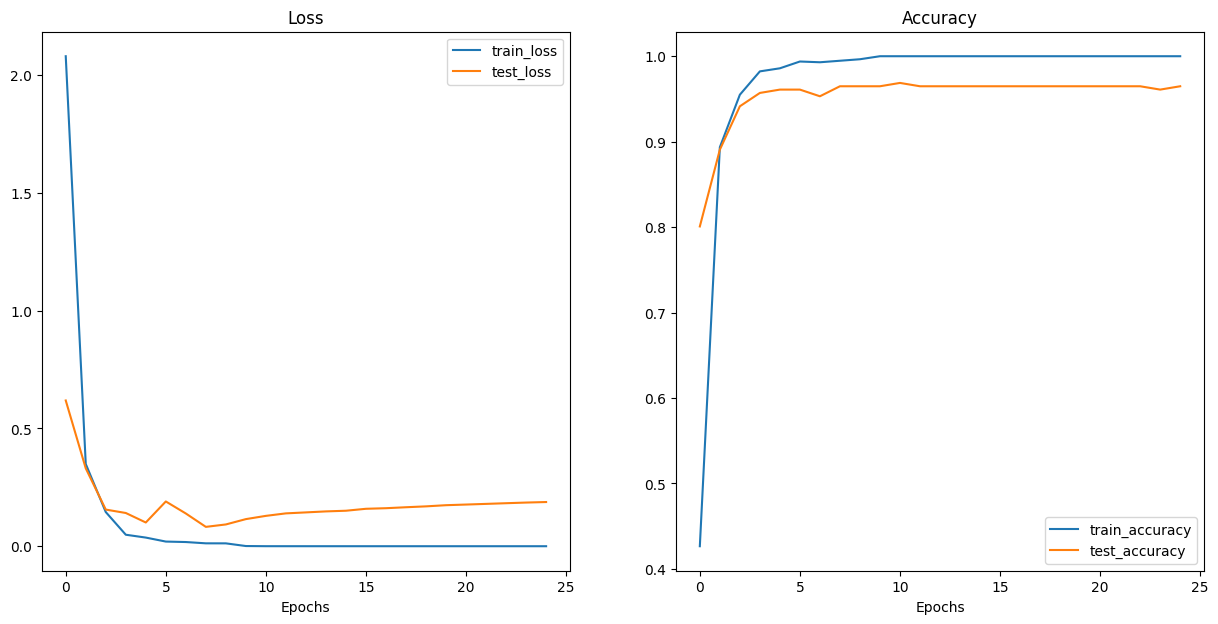

In [182]:
plot_loss_curves(model_0_results)